## An example to preprocess the Worldview-2 satellite image used in practical 2 (part 1) with the Geospatial Data Abstraction Library (GDAL)

* This Jupyter notebook contain code to 1) display metadata, 2) subset spatially (via .shp) and 3) spectrally (remove spectral bands) a 8 band Worldview-2 satellite image (Dunwich_20140701_WV2_raw.tif). I will include more code for band algebra (band ratios) and classification soon to replicate the image processing operations GEOM 2000/7000 students developed in Pract 2.  


### Initial setup

In [1]:
## importing python modules needed to run the notebook

import pprint
from matplotlib import pyplot as plt
import numpy as np
from osgeo import gdal
import os

In [2]:
globals().update(locals())

* Using [os.getcwd()](https://docs.python.org/3/library/os.html#) to check the working directory I am currently in

In [3]:
## first to check the working directory

os.getcwd()


'C:\\Users\\uqrborre'

* In my case I am in C drive. In case I want to map where my image is I need to use os.chdir() in python as below:

In [4]:
os.chdir('C:\\Users\\uqrborre\\Desktop\\RSRC_repo\\Data')

* Using the linux command "ls" to list what I have in 'C:\\Users\\uqrborre\\Desktop\\RSRC_repo\\Data'

In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0CE2-B5E3

 Directory of C:\Users\uqrborre\Desktop\RSRC_repo\Data

16/04/2019  09:16 AM    <DIR>          .
16/04/2019  09:16 AM    <DIR>          ..
13/04/2019  07:39 PM                90 Dunwich_20140701_WV2_raw8.tfw
13/04/2019  07:40 PM       426,806,570 Dunwich_20140701_WV2_raw8.tif
13/04/2019  07:39 PM            79,081 Dunwich_20140701_WV2_raw8.tif.aux.xml
13/04/2019  07:40 PM        74,110,855 Dunwich_20140701_WV2_raw8.tif.ovr
16/04/2019  09:16 AM       210,762,690 Dunwich_20140701_WV2_RGBN.tif
13/04/2019  08:53 PM                 5 shape.cpg
13/04/2019  08:53 PM               137 shape.dbf
13/04/2019  08:53 PM               145 shape.prj
13/04/2019  08:53 PM               132 shape.sbn
13/04/2019  08:53 PM               116 shape.sbx
13/04/2019  08:53 PM               716 shape.shp
13/04/2019  08:53 PM             6,091 shape.shp.xml
13/04/2019  08:53 PM               108 shape.shx
              13 File(s)    711,766,736 by

* As you see the Dunwich_20140701_WV2_raw.tif image is in this location. Let's assign the image to the variable "filename" for further processing

In [6]:
filename ='Dunwich_20140701_WV2_raw8.tif'

### Quality assurance/checking routines

* You may want to assess the histogram per image band to check its shape (distribution) to be sure not many peaks are present (peaks may be a signal of data corruption)

In [7]:
## lets get the image openned with Gdal first
image_gdal=gdal.Open(filename)

In [8]:
## get band 5 from the image
image_gdal =image_gdal.GetRasterBand(5).ReadAsArray()

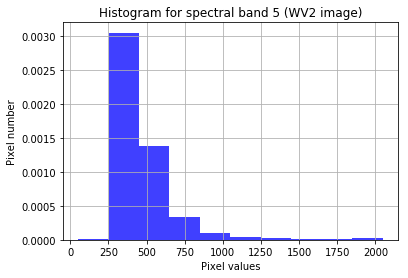

In [9]:
## histogram for band 5
plt.hist(image_gdal.ravel(), density=True,  facecolor='b', alpha=0.75)
plt.xlabel('Pixel values')
plt.ylabel('Pixel number')
plt.title('Histogram for spectral band 5 (WV2 image)')
plt.grid(True)
plt.show()

* Lets's check the metadata for the image as the first step to assess its quality so to be sure that your image has all the bands, geographic attributes like datum, projection, coordinates system, extent etc. For this we use the GDAL tool "gdal info". First let's import the python module subprocess

In [10]:
import subprocess
print (subprocess.check_output('gdalinfo '+'Dunwich_20140701_WV2_raw8.tif'+' -norat'+' -nomd',shell=True))

b'Driver: GTiff/GeoTIFF\r\nFiles: Dunwich_20140701_WV2_raw8.tif\r\n       Dunwich_20140701_WV2_raw8.tif.ovr\r\n       Dunwich_20140701_WV2_raw8.tif.aux.xml\r\nSize is 5577, 4723\r\nCoordinate System is:\r\nPROJCS["WGS_1984_UTM_Zone_56S",\r\n    GEOGCS["WGS 84",\r\n        DATUM["WGS_1984",\r\n            SPHEROID["WGS 84",6378137,298.257223563,\r\n                AUTHORITY["EPSG","7030"]],\r\n            AUTHORITY["EPSG","6326"]],\r\n        PRIMEM["Greenwich",0],\r\n        UNIT["degree",0.0174532925199433],\r\n        AUTHORITY["EPSG","4326"]],\r\n    PROJECTION["Transverse_Mercator"],\r\n    PARAMETER["latitude_of_origin",0],\r\n    PARAMETER["central_meridian",153],\r\n    PARAMETER["scale_factor",0.9996],\r\n    PARAMETER["false_easting",500000],\r\n    PARAMETER["false_northing",10000000],\r\n    UNIT["metre",1,\r\n        AUTHORITY["EPSG","9001"]],\r\n    AUTHORITY["EPSG","32756"]]\r\nOrigin = (535376.000000000000000,6964072.000000000000000)\r\nPixel Size = (2.000000000000000,-2

* Let's have a look at the image (loading the second spectral band) in the jupyter notebook to be sure it is intact using python's [matplotlyb library](https://matplotlib.org/) 


In [11]:
## lets get the image openned again with Gdal 
image=gdal.Open(filename)

In [12]:
image_gdal =image.GetRasterBand(5).ReadAsArray()

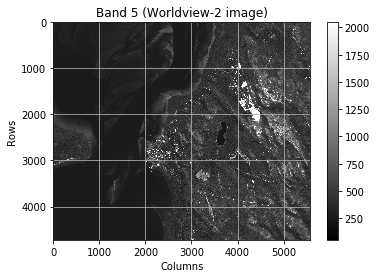

In [13]:
plt.imshow(image_gdal, cmap = "gray",  aspect='equal')

plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Band 5 (Worldview-2 image)')
plt.grid(True)

plt.show()


### Subsetting by shapefile

* A shapefile was previosly created (i.e. shape.shp located where the image is) to crop the image to include only land areas. The next code will use [gdalwarp](https://www.gdal.org/gdalwarp.html) to subset the image spatially 

In [14]:
shape1='shape.shp'

In [15]:
def subset():
    cmd="gdalwarp -of GTiff -cutline shape.shp -crop_to_cutline -dstalpha  Dunwich_20140701_WV2_raw8.tif Dunwich_20140701_WV2_raw8cut.tif"
    os.system(cmd)

In [16]:
subset ()

In [17]:
imagecut=gdal.Open('Dunwich_20140701_WV2_raw8cut.tif')

In [18]:
image_gdalcut =imagecut.GetRasterBand(1).ReadAsArray()

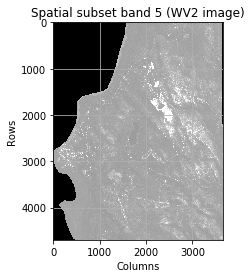

In [25]:
#plt.imshow(image_gdalcut, vmin=0, vmax=255, cmap = "gray", aspect='auto')
plt.imshow(image_gdalcut, vmin=0, vmax=800, cmap = "gray", aspect='equal')


#plt.colorbar()
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Spatial subset band 5 (WV2 image)')
plt.grid(True)

plt.show()


## Spectral subsetting (i.e. remove spectral bands that may not be useful for classification)

* Next we will use the tool [gdal_translate](http://www.gdal.org/gdal_translate.html) to subset the image from 8 bands to 4 bands (RGBN). This will create a new image named "Dunwich_20140701_WV2_RGBN.tif"​

In [26]:
def convertimg(infile):
    cmd= "gdal_translate -b 2 -b 3 -b 5 -b 7 %s Dunwich_20140701_WV2_RGBN.tif" %(infile)
    os.system(cmd)

In [27]:
convertimg(filename)

* Done! the Dunwich_20140701_WV2_RGBN.tif image was created. To be sure let's read the working dir again and check the metadata for the number of bands.

In [28]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 0CE2-B5E3

 Directory of C:\Users\uqrborre\Desktop\RSRC_repo\Data

16/04/2019  09:53 AM    <DIR>          .
16/04/2019  09:53 AM    <DIR>          ..
13/04/2019  07:39 PM                90 Dunwich_20140701_WV2_raw8.tfw
13/04/2019  07:40 PM       426,806,570 Dunwich_20140701_WV2_raw8.tif
13/04/2019  07:39 PM            79,081 Dunwich_20140701_WV2_raw8.tif.aux.xml
13/04/2019  07:40 PM        74,110,855 Dunwich_20140701_WV2_raw8.tif.ovr
16/04/2019  09:51 AM       308,753,098 Dunwich_20140701_WV2_raw8cut.tif
16/04/2019  09:53 AM       210,762,690 Dunwich_20140701_WV2_RGBN.tif
13/04/2019  08:53 PM                 5 shape.cpg
13/04/2019  08:53 PM               137 shape.dbf
13/04/2019  08:53 PM               145 shape.prj
13/04/2019  08:53 PM               132 shape.sbn
13/04/2019  08:53 PM               116 shape.sbx
13/04/2019  08:53 PM               716 shape.shp
13/04/2019  08:53 PM             6,091 shape.shp.xml
13/04/2019  08:53 P

* Checking metadata

In [29]:
import subprocess
print (subprocess.check_output('gdalinfo '+'Dunwich_20140701_WV2_RGBN.tif'+' -norat'+' -nomd',shell=True))

b'Driver: GTiff/GeoTIFF\r\nFiles: Dunwich_20140701_WV2_RGBN.tif\r\nSize is 5577, 4723\r\nCoordinate System is:\r\nPROJCS["WGS 84 / UTM zone 56S",\r\n    GEOGCS["WGS 84",\r\n        DATUM["WGS_1984",\r\n            SPHEROID["WGS 84",6378137,298.257223563,\r\n                AUTHORITY["EPSG","7030"]],\r\n            AUTHORITY["EPSG","6326"]],\r\n        PRIMEM["Greenwich",0,\r\n            AUTHORITY["EPSG","8901"]],\r\n        UNIT["degree",0.0174532925199433,\r\n            AUTHORITY["EPSG","9122"]],\r\n        AUTHORITY["EPSG","4326"]],\r\n    PROJECTION["Transverse_Mercator"],\r\n    PARAMETER["latitude_of_origin",0],\r\n    PARAMETER["central_meridian",153],\r\n    PARAMETER["scale_factor",0.9996],\r\n    PARAMETER["false_easting",500000],\r\n    PARAMETER["false_northing",10000000],\r\n    UNIT["metre",1,\r\n        AUTHORITY["EPSG","9001"]],\r\n    AXIS["Easting",EAST],\r\n    AXIS["Northing",NORTH],\r\n    AUTHORITY["EPSG","32756"]]\r\nOrigin = (535376.000000000000000,6964072.0000

....The next function in this notebook will produce an NDVI image from the WV-2 image subset
..stay tunned!